# Histograms, Binnings, and Density

A simple hsitogram can be a great first step in understanding a dataset. Let's see a Matplotlib's histogram function, which creates a basic histogram in one line, once the boiler-plate imports are done:

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

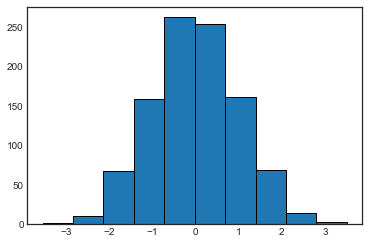

In [7]:
plt.hist(data, edgecolor='black');

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

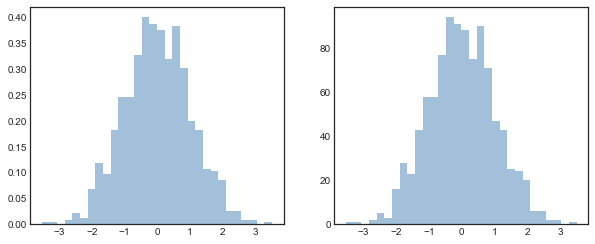

In [37]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10,6)

ax[0].hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue', label="True Density");

ax[1].hist(data, bins=30, density=False, alpha=0.5,
         histtype='stepfilled', color='steelblue', label="False Density");

`histtype='stepfilled'` along with some transparency `alpha` to be very useful when comparing histograms of several distributions:

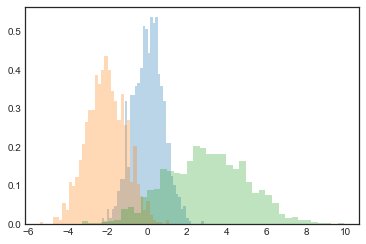

In [47]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If we would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, then `np.histogram()` is our function.

In [45]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 12 226 515 230  17]


## Two-Dimensional Histograms and Binnings 

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.

We'll start by defining some data-an `x` and `y` array drawn from a multivariabte Gaussian distribution:

In [49]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

## `plt.hist2d`: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

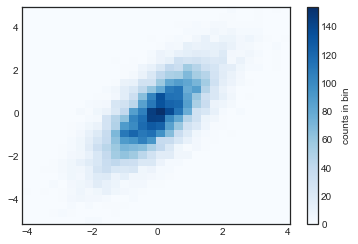

In [50]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## `plt.hexbin`: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the `plt.hexbin` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

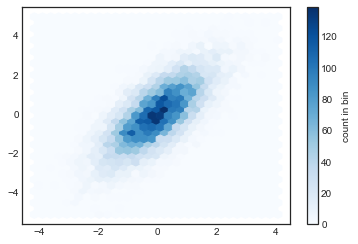

In [51]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Kernel density estimation

Another common method of evaluating densities in multiple dimensions is _kernel density estimation_ (KDE). We'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function. One extremely quick and simple KDE implementation exists in the `scipy.stats` package. Here is a quick example of using the KDE on this data:

In [53]:
from scipy.stats import gaussian_kde

#fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

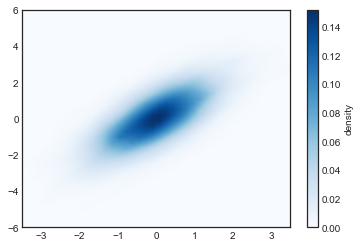

In [59]:
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues', interpolation='bilinear')
cb = plt.colorbar()
cb.set_label("density")